In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('final_train.csv')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [7]:
df.shape

(5961, 7)

In [8]:
df_test=pd.read_csv('final_test.csv')
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [9]:
df_test.shape

(1987, 6)

In [10]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

there are null values present in our dataset.

In [11]:
df['Fees'].unique()

array([100, 350, 300, 250, 200, 700, 500, 400, 150, 650, 600,  50, 800,
       750, 450,  80,  60, 550, 900, 950, 430, 130, 630, 499, 260,  70,
        10, 299, 230, 380,   5, 280,  40,  30, 180, 920, 125, 850,  20,
       220], dtype=int64)

In [12]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [13]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [14]:
df.isnull().values.any()

True

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


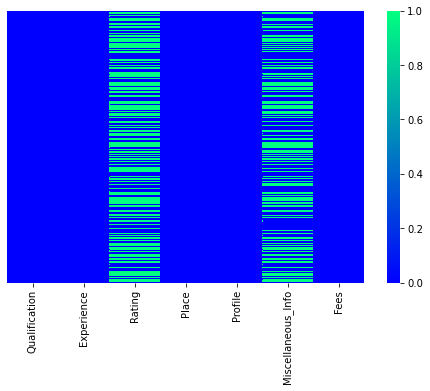

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cmap='winter',yticklabels=False)

In [17]:
for col in ['Rating','Miscellaneous_Info','Place']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [18]:
df.isnull().values.any()

False

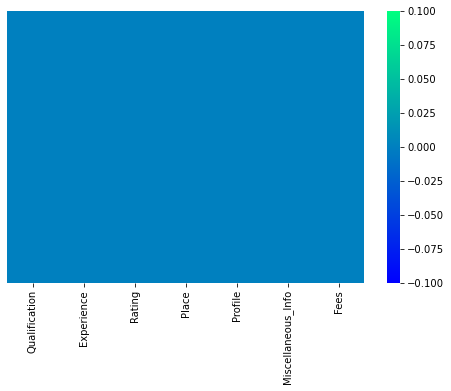

In [19]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cmap='winter',yticklabels=False)

now all the null values are replaced with the mode.

In [20]:
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ':' +str(df[column].unique()))
        print(df[column].value_counts())
        print('__________________________________________________')
        print('\n')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                                    488
BHMS                                                                                                                   477
BAMS                                                                                                                   471
MBBS                                                                                                                   334
MBBS, MS - ENT                                                                                                         220
                             

In [21]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


all other columns are in object format we have convert it into integer form to make some analysis.

# data Analysis.



100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


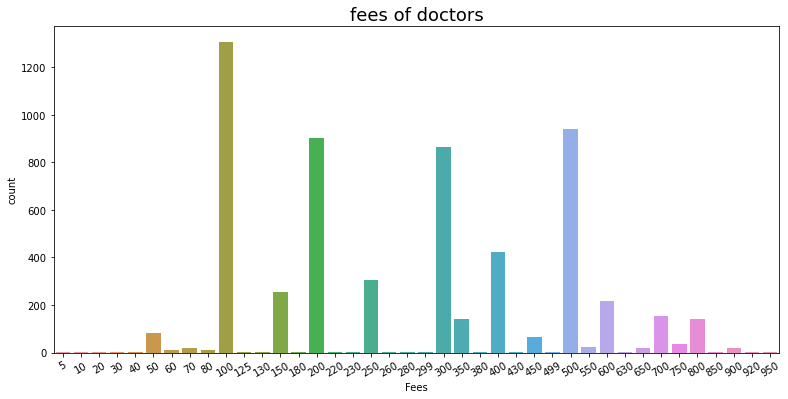

In [22]:
plt.figure(figsize=(13,6))
sns.countplot(x='Fees',data=df)
plt.xticks(rotation=30)
plt.title('fees of doctors',size=18)
print('\n')
print(df['Fees'].value_counts())

most doctors are having a standard fees of 100.



Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


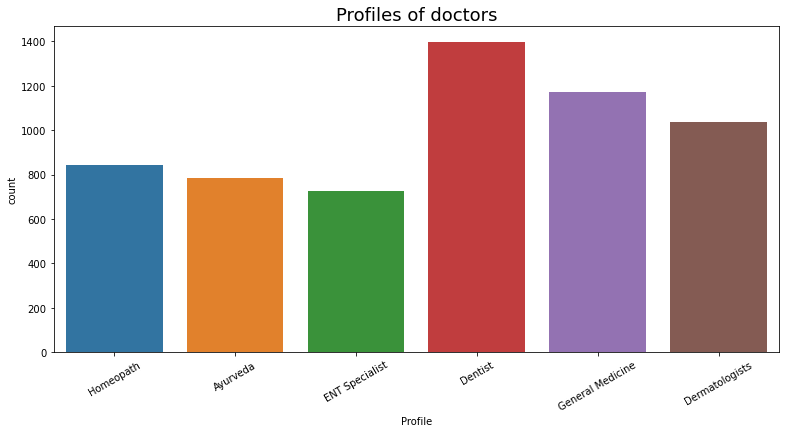

In [23]:
plt.figure(figsize=(13,6))
sns.countplot(x='Profile',data=df)
plt.xticks(rotation=30)
plt.title('Profiles of doctors',size=18)
print('\n')
print(df['Profile'].value_counts())

most doctors are dentists.



100%    3986
98%      290
99%      259
97%      241
96%      220
95%      178
94%      115
93%      109
92%       66
90%       66
91%       60
89%       42
88%       41
85%       27
82%       23
83%       21
86%       21
80%       19
77%       16
87%       14
84%       13
79%       13
67%       12
81%       12
76%        9
71%        9
73%        8
75%        8
60%        7
74%        7
78%        6
56%        5
68%        5
70%        4
69%        4
57%        3
72%        3
63%        2
62%        2
55%        2
64%        2
33%        2
53%        1
47%        1
36%        1
45%        1
7%         1
58%        1
65%        1
40%        1
48%        1
Name: Rating, dtype: int64


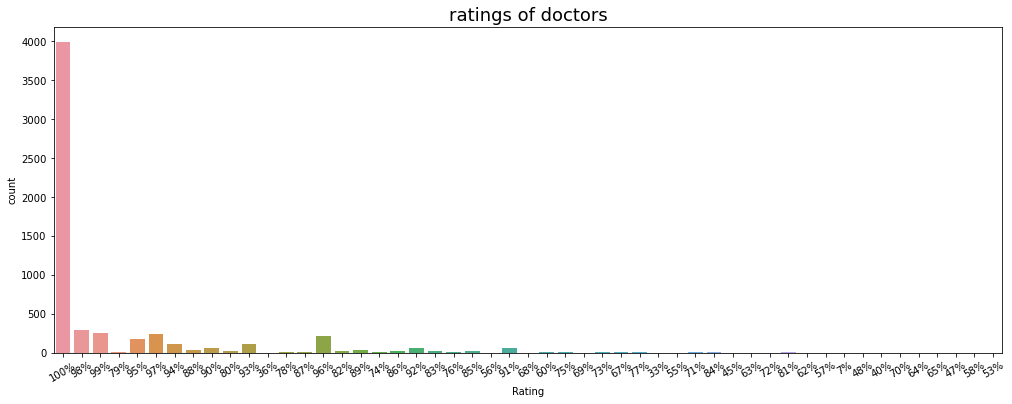

In [24]:
plt.figure(figsize=(17,6))
sns.countplot(x='Rating',data=df)
plt.xticks(rotation=30)
plt.title('ratings of doctors',size=18)
print('\n')
print(df['Rating'].value_counts())

most of the doctors are having 100% ratings



9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
61 years experience      1
64 years experience      1
58 years experience      1
60 years experience      1
66 years experience      1
Name: Experience, Length: 64, dtype: int64


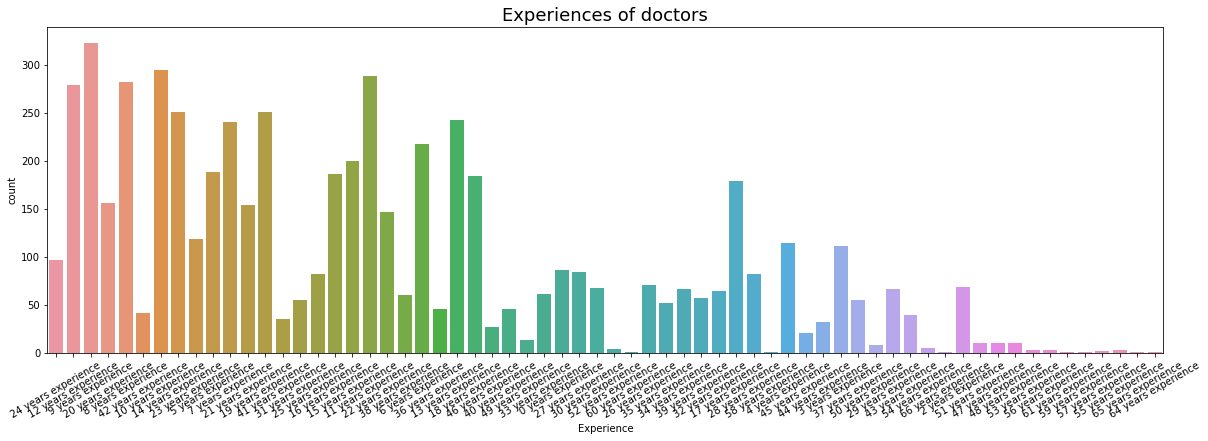

In [25]:
plt.figure(figsize=(20,6))
sns.countplot(x='Experience',data=df)
plt.xticks(rotation=30)
plt.title('Experiences of doctors',size=18)
print('\n')
print(df['Experience'].value_counts())

most of the doctors are having 9 years of experience.

# bivirate analysis.



Experience          Fees
0 years experience  100     47
                    200     13
                    500      6
                    400      5
                    150      3
                            ..
9 years experience  550      2
                    650      2
                    30       1
                    60       1
                    750      1
Name: Fees, Length: 712, dtype: int64


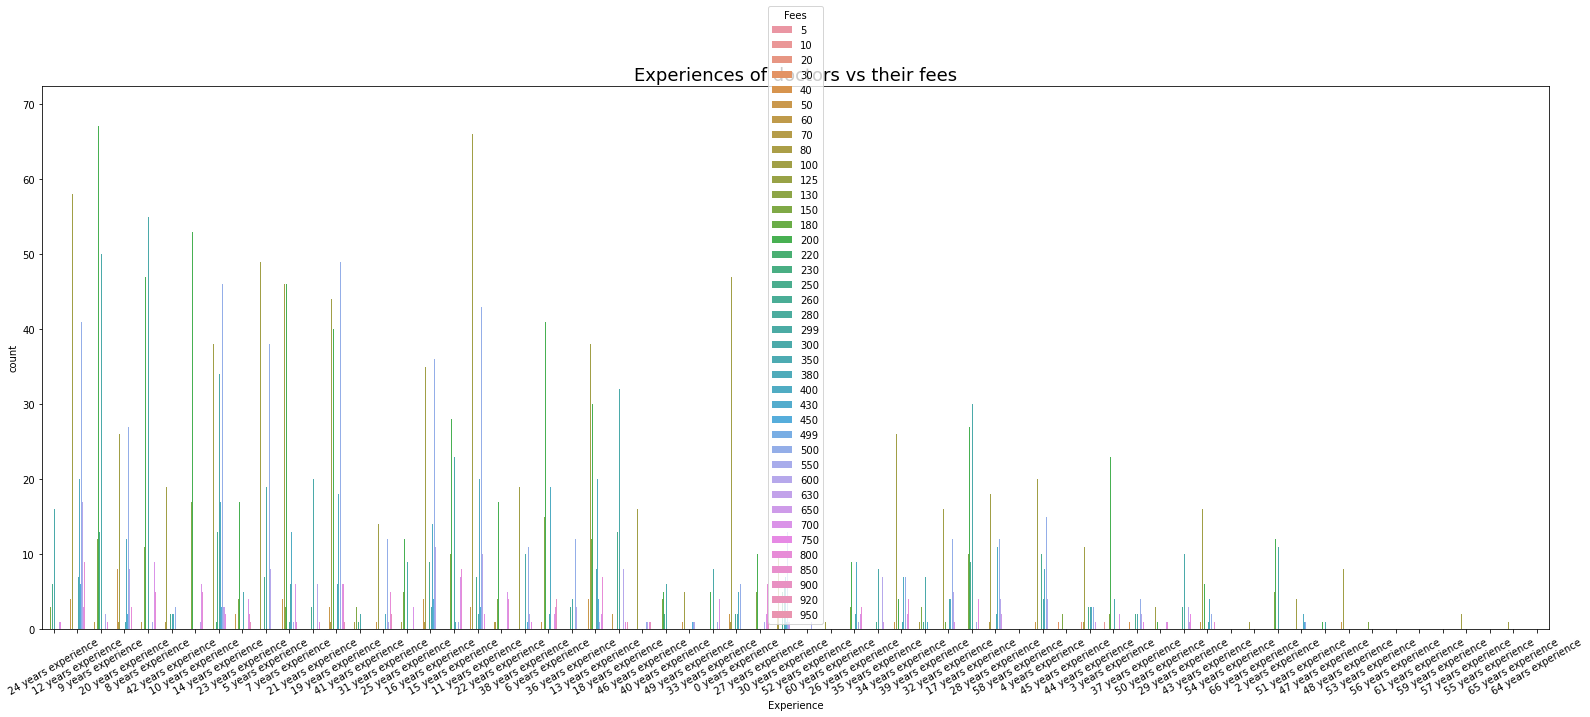

In [26]:
plt.figure(figsize=(27,10))
sns.countplot(x='Experience',hue='Fees',data=df)
plt.xticks(rotation=30)
plt.title('Experiences of doctors vs their fees',size=18)
print('\n')
print(df.groupby('Experience')['Fees'].value_counts())



Profile    Fees
Ayurveda   100     203
           200     126
           300     120
           500     111
           150      57
                  ... 
Homeopath  40        1
           130       1
           499       1
           550       1
           920       1
Name: Fees, Length: 133, dtype: int64


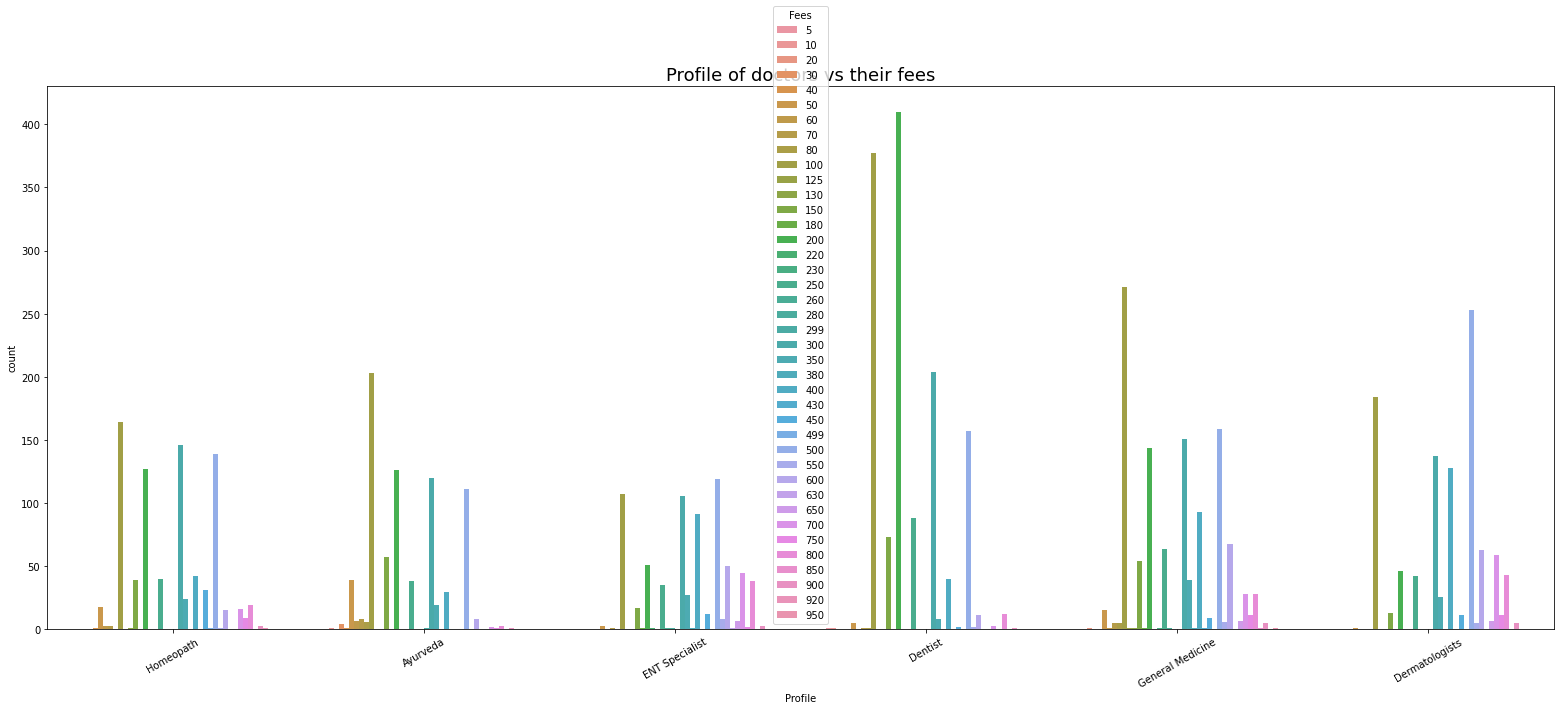

In [27]:
plt.figure(figsize=(27,10))
sns.countplot(x='Profile',hue='Fees',data=df)
plt.xticks(rotation=30)
plt.title('Profile of doctors vs their fees',size=18)
print('\n')
print(df.groupby('Profile')['Fees'].value_counts())

dentist doctors are having more fees than others.



Rating  Fees
100%    100     959
        200     648
        300     569
        500     558
        250     233
               ... 
99%     150       5
        350       5
        800       5
        750       3
        450       1
Name: Fees, Length: 371, dtype: int64


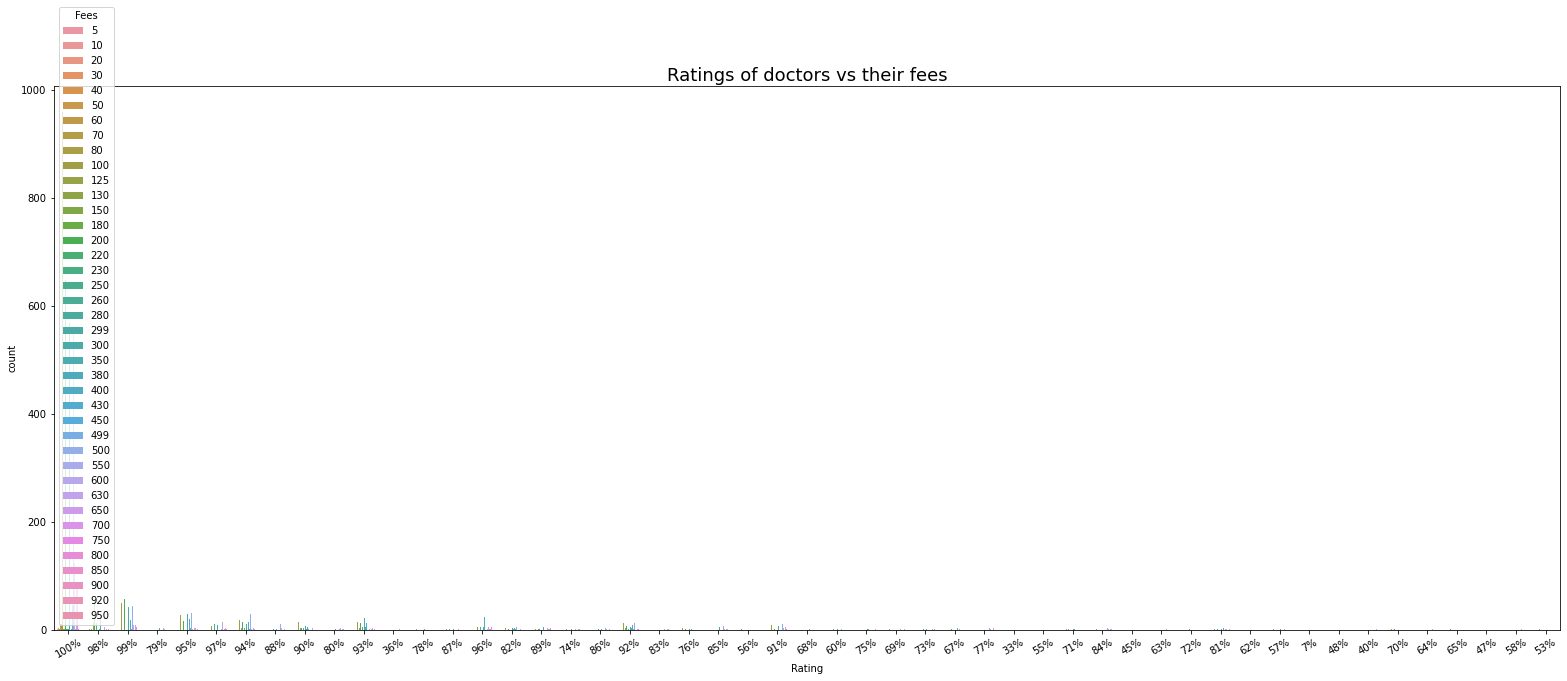

In [28]:
plt.figure(figsize=(27,10))
sns.countplot(x='Rating',hue='Fees',data=df)
plt.xticks(rotation=30)
plt.title('Ratings of doctors vs their fees',size=18)
print('\n')
print(df.groupby('Rating')['Fees'].value_counts())

# changing the values:

In [29]:
le=LabelEncoder()

In [30]:
df['Qualification']=le.fit_transform(df['Qualification'])

In [31]:
df['Experience']=le.fit_transform(df['Experience'])

In [32]:
df['Rating']=le.fit_transform(df['Rating'])

In [33]:
df['Place']=le.fit_transform(df['Place'])

In [34]:
df['Profile']=le.fit_transform(df['Profile'])

In [35]:
df['Miscellaneous_Info']=le.fit_transform(df['Miscellaneous_Info'])

In [36]:
df.dtypes

Qualification         int32
Experience            int32
Rating                int32
Place                 int32
Profile               int32
Miscellaneous_Info    int32
Fees                  int64
dtype: object

all the values are coverted into numerical.

# summary stats

In [37]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,414.368059,2.441872,1573.343902,307.944640
std,413.842446,20.937163,21.137633,258.547684,1.658014,640.388185,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,15.000000,0.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,42.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,2997.000000,950.000000


observationS:
    huge difference in 75% and 100% of data , therefore outliers are present.
    data is mostly right side skewed, as mean is greater than median.

Text(0.5, 1.0, 'Correlation with the target variable')

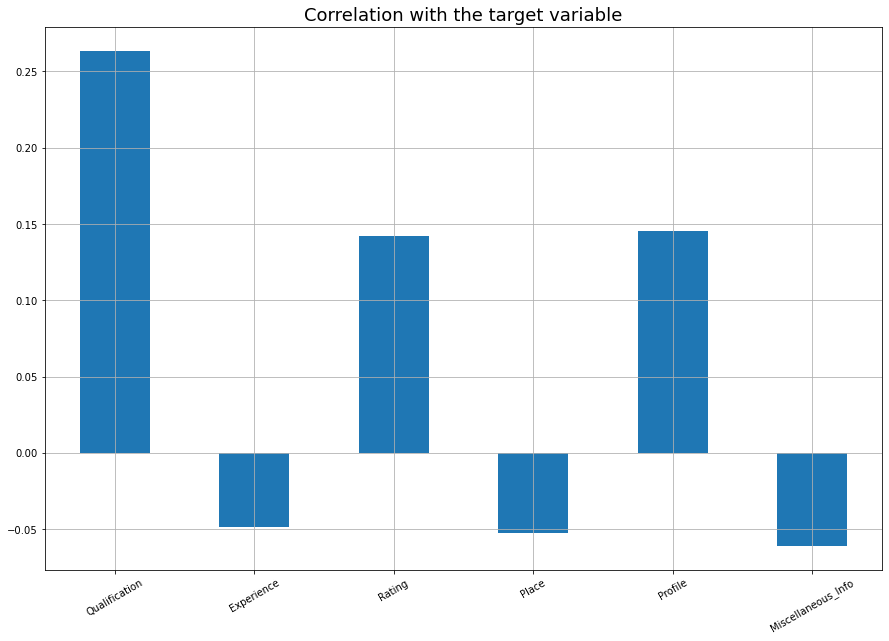

In [38]:
plt.figure(figsize=(15,10))
df.drop('Fees',axis=1).corrwith(df['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title('Correlation with the target variable',size=18)

observation:
    qualification is highly dependent on fees,whether miscellaneous info is negatively independent.

In [39]:
collist=df.columns.values
ncol=13
nrow=10
collist

array(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'], dtype=object)

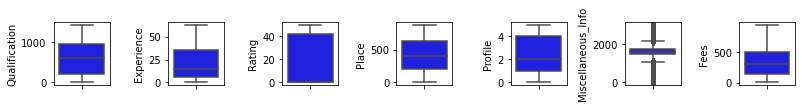

In [40]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(ncol,nrow,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [41]:
df.skew()

Qualification         0.239720
Experience            0.823531
Rating                0.817666
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.751870
dtype: float64

# removing outliers

In [42]:
threshold=3
df_zscore=df.drop('Fees',axis=1)

In [43]:
z=np.abs(zscore(df_zscore))

In [44]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(5961, 7)

In [45]:
df=df_new

In [46]:
x=df.drop('Fees',axis=1)

# scaling of model

In [47]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)
x.shape

(5961, 6)

In [48]:
y=df['Fees']
y.shape

(5961,)

# model training.

In [49]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),ExtraTreesClassifier()]

In [50]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('the accuracy score of',m,'is:',accuracy_score(y_test,predm))
    print('the confusion matrix of',m,'is:',confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('_________________________________________________________________')

0.2311241610738255
the accuracy score of LogisticRegression() is: 0.2347024308466052
the confusion matrix of LogisticRegression() is: [[  0   0   0   0  12   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0 197   0   0   6   0   0   6   0   0   1   0  42   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  40   0   0   4   0   0   1   0   0   0   0   4   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0 147   0   0  19   0   0   2   0   0   0   0  17   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 

we are getting the max accuracy in gradient boosting classifier.

In [51]:
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model',m)
    print('score',score)
    print('mean score of',m,'is:',score.mean())
    print('standard deviation of',m,'is-',score.std())
    print('_________________________________________________________________')

Model LogisticRegression()
score [0.23218776 0.22231544 0.21728188 0.23154362 0.22651007]
mean score of LogisticRegression() is: 0.22596775373121733
standard deviation of LogisticRegression() is- 0.005636608493438434
_________________________________________________________________
Model SVC()
score [0.26571668 0.24832215 0.24580537 0.25419463 0.24412752]
mean score of SVC() is: 0.25163326901331595
standard deviation of SVC() is- 0.00782518135127921
_________________________________________________________________
Model KNeighborsClassifier()
score [0.21458508 0.2147651  0.2147651  0.21224832 0.23154362]
mean score of KNeighborsClassifier() is: 0.2175814454564377
standard deviation of KNeighborsClassifier() is- 0.007045941277998501
_________________________________________________________________
Model DecisionTreeClassifier()
score [0.22045264 0.21392617 0.19043624 0.20385906 0.23322148]
mean score of DecisionTreeClassifier() is: 0.21237911868449624
standard deviation of DecisionTreeC